In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm
from sklearn import metrics


In [2]:
data=pd.read_csv('cell_samples.csv')



In [3]:
data.head(20)
data.count()
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [4]:
malignant_df=data[data['Class']==4][:200]
benign_df=data[data['Class']==2][:200]

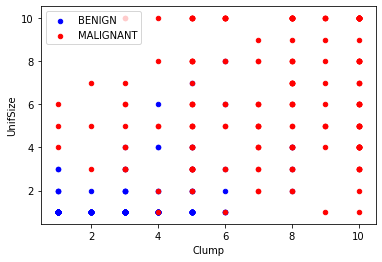

In [5]:

axes=benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='BENIGN')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='MALIGNANT', ax=axes)


In [6]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [7]:
data=data[pd.to_numeric(data['BareNuc'],errors='coerce').notnull()]

data['BareNuc']=data['BareNuc'].astype(int)



In [8]:
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [9]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:
data.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [11]:
X=data[['Clump', 'UnifSize', 'UnifShape','MargAdh', 'SingEpiSize', 'BareNuc' ,'BlandChrom','NormNucl','Mit']]
y=data['Class']

In [26]:

x_train,x_test,y_train,y_test= sklearn.model_selection.train_test_split(X,y,test_size=0.2)

clf=svm.SVC(kernel='linear',C=8)

clf.fit(x_train,y_train)


SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:

y_pred=clf.predict(x_test)
acc=metrics.accuracy_score(y_test,y_pred)
acc


0.9781021897810219

In [28]:
y_test=list(y_test)
x_test=pd.DataFrame(x_test)
x_test.values



array([[ 5,  1,  1, ...,  3,  1,  1],
       [10, 10, 10, ...,  4,  1,  1],
       [10,  1,  1, ...,  5,  4,  1],
       ...,
       [ 6, 10, 10, ...,  7, 10,  7],
       [ 5,  3,  5, ...,  4, 10,  1],
       [ 2,  1,  1, ...,  1,  1,  1]])

In [29]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [30]:
#Cheking model accuracy by comparing actual known results with the predicted ones 
for i in range(len(y_pred)):
    print(y_pred[i],x_test.values[i],y_test[i])

2 [5 1 1 1 1 1 3 1 1] 2
4 [10 10 10  8  2 10  4  1  1] 4
4 [10  1  1  1  2 10  5  4  1] 4
2 [5 1 3 1 2 1 2 1 1] 2
2 [1 1 3 1 2 1 2 1 1] 2
4 [ 6 10 10 10  8 10 10 10  7] 4
2 [2 1 1 1 2 1 3 1 1] 2
2 [3 1 1 1 2 1 3 1 1] 2
2 [1 1 1 1 1 1 2 1 1] 2
4 [10 10 10  2 10 10  5  3  3] 4
2 [4 1 3 1 2 1 2 1 1] 2
2 [ 3  6  4 10  3  3  3  4  1] 4
2 [1 1 1 1 2 1 1 1 1] 2
2 [1 1 1 1 2 1 3 1 1] 2
2 [3 1 1 1 2 1 3 2 1] 2
2 [2 1 1 1 2 1 3 1 1] 2
2 [3 1 2 2 2 1 1 1 1] 2
2 [5 1 1 3 2 1 1 1 1] 2
2 [3 2 1 1 2 2 3 1 1] 2
4 [10 10 10  3 10 10  9 10  1] 4
2 [1 1 1 1 2 1 1 1 1] 2
2 [4 1 1 1 2 1 1 1 1] 2
2 [4 1 1 1 2 1 3 1 1] 2
2 [2 1 1 1 2 1 3 1 1] 2
4 [10  4  5  4  3  5  7  3  1] 4
2 [3 1 1 1 2 1 3 1 1] 2
2 [1 2 3 1 2 1 3 1 1] 2
2 [3 1 1 1 2 1 2 1 1] 2
2 [3 1 1 1 2 1 1 1 1] 2
4 [10  4  6  1  2 10  5  3  1] 4
4 [ 8 10  5  3  8  4  4 10  3] 4
2 [1 1 1 1 1 1 1 3 1] 2
2 [1 1 1 1 2 1 3 1 1] 2
2 [1 1 1 1 2 1 1 1 1] 2
2 [5 1 1 1 2 1 3 1 2] 2
2 [3 1 1 3 8 1 5 8 1] 2
2 [2 1 1 1 2 1 1 1 1] 2
2 [3 1 1 1 2 1 3 1 1] 2
2 [6 1 

In [41]:
x_input=[]

In [42]:
def inputt():
    print('Enter details about cells in the following order :clump ->UnifSize -> UnifShape->MargAdh ->SingEpiSize -> BareNuc->BlandChrom-> NormNucl->Mit')
    x_input=input().split()

In [43]:
def predict():
    inputt()
    x_predict=clf.predict(x_input)
    if(x_predict==2):
        print('Benign cell')
    elif(x_predict==4):
        print('Malignant cell')

In [44]:
Ch='y'
while(Ch=='y'):
    print('*********************************************CANCER CELL PREDICTION*****************************')
    print()
    predict()
    print('Do you want to comntinue?(y/n)')
    Ch=input()

*********************************************CANCER CELL PREDICTION*****************************

Enter details about cells in the following order :clump ->UnifSize -> UnifShape->MargAdh ->SingEpiSize -> BareNuc->BlandChrom-> NormNucl->Mit
10  4  5  4  3  5  7  3  1


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.